# Bayesianism and Regression

![](https://upload.wikimedia.org/wikipedia/commons/d/d4/Thomas_Bayes.gif)![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/54/Bayes_sig.svg/300px-Bayes_sig.svg.png)

## On Inverse Probability

$$\displaystyle\Large P(A | B) = \frac{P(B|A)P(A)}{P(B)}$$

- P(A): **Prior** to evidence
- P(B|A): **Likelihood** or probability of evidence B given that A is true
- P(A|B): **Posterior** or probability of A after taking B into account




## $P(B)$

$$\displaystyle\Large P(B) = P(B | A_1)P(A_1) + P(B | A_2)P(A_2) + ... + P(B | A_n)P(A_n) = \sum_i P(B|A_i)P(A_i)$$

$$\displaystyle\Large P(A|B) \propto P(B | A) P(A)$$

## Maximum a posteriori

The mode of the posterior, approximated with Markov chain Monte Carlo.

Related to Maximum LIkelihood but with regularization term!

$$\displaystyle\Large \hat{\theta}_{MLE}(x) = {\underset {\theta }{\operatorname {arg\,max} }}\ f(x \mid \theta)$$

We have $f$ as a sampling distribution of $x$, and would then interpret $f(x | \theta)$ as the probability of $x$ when the underlying population parameter is $\theta$.

With a **prior** $g$ over $\theta$, we now have
 
$${\displaystyle\Large \theta \mapsto f(\theta \mid x)={\frac {f(x\mid \theta )\,g(\theta )}{\displaystyle\Large \int _{\Theta }f(x\mid \vartheta )\,g(\vartheta )\,d\vartheta }}\!}$$

### Mode of Posterior

$${\displaystyle\Large {\hat {\theta }}_{\mathrm {MAP} }(x)={\underset {\theta }{\operatorname {arg\,max} }}\ f(\theta \mid x)={\underset {\theta }{\operatorname {arg\,max} }}\ {\frac {f(x\mid \theta )\,g(\theta )}{\displaystyle \int _{\Theta }f(x\mid \vartheta )\,g(\vartheta )\,d\vartheta }}={\underset {\theta }{\operatorname {arg\,max} }}\ f(x\mid \theta )\,g(\theta ).\!}$$

## Example I: The Cookie Problem

**Bowl 1**: 10 Chocolate and 30 Vanilla

**Bowl 2**: 20 Chocolate and 20 Vanilla

Select a bowl at random, then pick a cookie at random.  The cookie is vanilla -- what is the probability that it was picked from Bowl 1?



H: Cookie came from Bowl 1 (Hypothesis)

D: Cookie is Vanilla

---------

$p(H | D)$: posterior

$p(H)$: prior = 1/2

$p(D | H)$: conditional likelihood = 3/4

$p(D)$: total probability = 5/8

$$\rightarrow (1/2)(3/4)/(5/8)$$

$p(H)$ 50%

$p(H | D)$ 60%

| bowl | prior | likelihood | unnorm posterior | posterior |
| ------- | -------- | --------------- | ----------------------------- | -------------- |
| bowl 1 | 1/2 | 3/4 | 3/8 | 3/5  |
| bowl 2 | 1/2 | 1/2 | 2/8 | 2/5 |

## Basic Example

Website layout problem, which should we choose?

In [1]:
n_visitors_a = 100  # number of visitors shown layout A
n_conv_a = 4        # number of vistors shown layout A who converted (4%)

n_visitors_b = 40  
n_conv_b = 2

In [2]:
import random

def trial_conversion_a():
  #generates a random number between 0 and 1
    return random.random()

In [3]:
trial_conversion_a()

0.5742566392690722

In [4]:
def simulate_conversion(p, n_visitors):
  #runs fake experiment
  #converted users are added and we 
  #are returned a total
    outcomes = 0
    for i in range(n_visitors):
        if random.random() < p:
            outcomes += 1
    return outcomes

In [5]:
simulate_conversion(.14, 5000)

709

In [6]:
def estimate_conversion(n_visitors, n_conv, trial_conversion, n_estimates = 5000):
    #counter
    i = 0
    #list to populate with estimates
    ests = []
    #loop through and simulate
    while i < n_estimates:
        p = trial_conversion()
        n_sim = simulate_conversion(p, n_visitors)
        if n_conv == n_sim:
            ests.append(p)
            i += 1
    return ests

In [7]:
a_estimates = estimate_conversion(n_visitors_a, n_conv_a, trial_conversion_a)
len(a_estimates)

5000

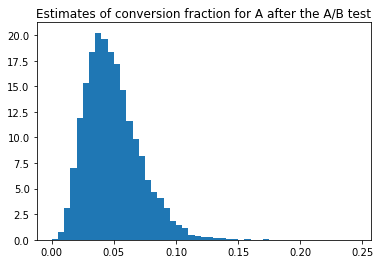

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
abbins = [i/200.0 for i in range(50)]  # 50 bins between 0 and 0.25

plt.hist(a_estimates, bins=abbins, density=True)
plt.title('Estimates of conversion fraction for A after the A/B test');

Assume we know conversion factor for B.

In [10]:
def trial_conversion_b():
    while True:
        x = random.normalvariate(mu = 0.06, sigma = 0.02)
        if 0 <= x <= 1:
            return x
        
trial_conversion_b()

0.072804472987265

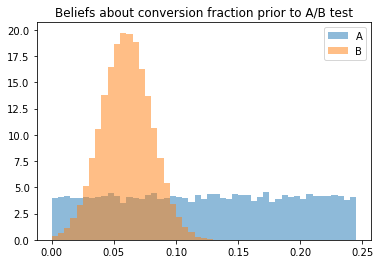

In [11]:
trial_as = [trial_conversion_a() for _ in range(100000)]
trial_bs = [trial_conversion_b() for _ in range(100000)]

plt.hist(trial_as, bins=abbins, label='A', alpha = 0.5, density = True)
plt.hist(trial_bs, bins=abbins, label='B', alpha=0.5, density = True)
plt.title('Beliefs about conversion fraction prior to A/B test')
plt.legend();

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


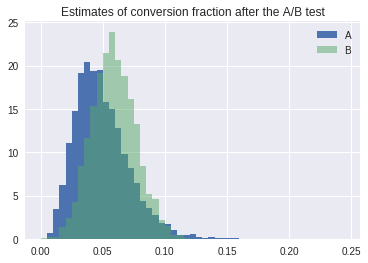

In [11]:
b_estimates = estimate_conversion(n_visitors_b, n_conv_b, trial_conversion_b)
plt.hist(a_estimates, bins=abbins, label='A', normed=True)
plt.hist(b_estimates, bins=abbins, label='B', alpha=0.5, normed=True)
plt.title('Estimates of conversion fraction after the A/B test')
plt.legend();

In [12]:
#is b better?
b_better = [b > a for a, b in zip(a_estimates, b_estimates)]
print(b_better[:10])

[False, True, True, True, True, True, True, False, False, False]


In [13]:
print(sum(b_better)/len(b_better))

0.6606


Text(0.5, 1.02, 'Bayesian updating of posterior probabilities')

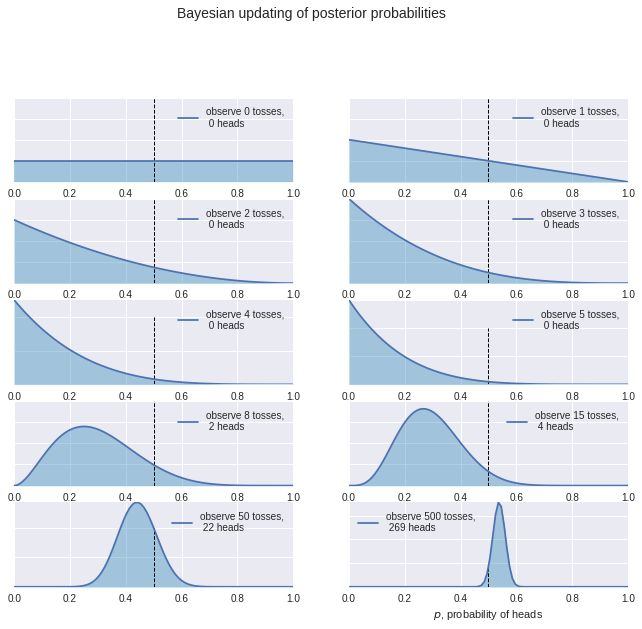

In [14]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(11, 9)

import scipy.stats as stats

dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

# For the already prepared, I'm using Binomial's conj. prior.
for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials) / 2, 2, k + 1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials) - 1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

In [0]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
np.random.seed(42)

 
# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (9, 9)

import seaborn as sns

from IPython.core.pylabtools import figsize

# Scipy helper functions
from scipy.stats import percentileofscore
from scipy import stats

In [0]:
# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy

In [0]:
# PyMC3 for Bayesian Inference
import pymc3 as pm

In [18]:
# Read in class scores
df = pd.read_csv('https://media.githubusercontent.com/media/WillKoehrsen/Data-Analysis/master/bayesian_lr/data/student-mat.csv')

# Filter out grades that were 0
df = df[~df['G3'].isin([0, 1])]

df = df.rename(columns={'G3': 'Grade'})

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [0]:
for i, j in zip(a, b):

In [0]:
# Takes in a dataframe, finds the most correlated variables with the
# grade and returns training and testing datasets

# Calculate percentile for grades
df['percentile'] = df['Grade'].apply(lambda x: percentileofscore(df['Grade'], x))

def format_data(df):
    # Targets are final grade of student
    labels = df['Grade']
    
    # Drop the school and the grades from features
    df = df.drop(columns=['school', 'G1', 'G2', 'percentile'])
    
    # One-Hot Encoding of Categorical Variables
    df = pd.get_dummies(df)
    
    # Find correlations with the Grade
    most_correlated = df.corr().abs()['Grade'].sort_values(ascending=False)
    
    # Maintain the top 6 most correlation features with Grade
    most_correlated = most_correlated[:8]
    
    df = df.loc[:, most_correlated.index]
    df = df.drop(columns = 'higher_no')
    
    # Split into training/testing sets with 25% split
    X_train, X_test, y_train, y_test = train_test_split(df, labels, 
                                                        test_size = 0.25,
                                                        random_state=42)
    
    return X_train, X_test, y_train, y_test

In [20]:
X_train, X_test, y_train, y_test = format_data(df)
X_train.head()

,Grade,failures,higher_yes,Medu,studytime,Fedu,absences
619,13,0,1,3,2,3,6
323,10,0,1,4,1,3,0
201,16,0,1,2,2,1,0
410,17,0,1,2,2,2,0
426,11,0,1,3,1,3,4


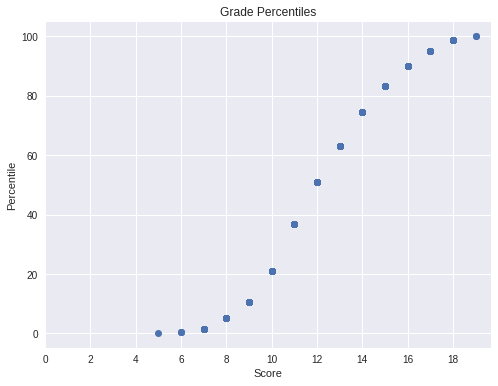

In [21]:

# Plot percentiles for grades
plt.figure(figsize = (8, 6))
plt.plot(df['Grade'], df['percentile'], 'o')
plt.xticks(range(0, 20, 2), range(0, 20, 2))
plt.xlabel('Score'); plt.ylabel('Percentile'); plt.title('Grade Percentiles');

In [0]:
# Rename variables in train and teste
X_train = X_train.rename(columns={'higher_yes': 'higher_edu', 
                                  'Medu': 'mother_edu',
                                  'Fedu': 'father_edu'})

X_test = X_test.rename(columns={'higher_yes': 'higher_edu', 
                                  'Medu': 'mother_edu',
                                  'Fedu': 'father_edu'})

In [23]:
# Formula for Bayesian Linear Regression (follows R formula syntax
formula = 'Grade ~ ' + ' + '.join(['%s' % variable for variable in X_train.columns[1:]])
formula

'Grade ~ failures + higher_edu + mother_edu + studytime + father_edu + absences'

In [24]:
# Context for the model
with pm.Model() as normal_model:
    
    # The prior for the model parameters will be a normal distribution
    family = pm.glm.families.Normal()
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = X_train, family = family)
    
    # Perform Markov Chain Monte Carlo sampling
    normal_trace = pm.sample(draws=2000, chains = 2, tune = 500, njobs=-1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
Sequential sampling (2 chains in 1 job)
NUTS: [sd, absences, father_edu, studytime, mother_edu, higher_edu, failures, Intercept]
100%|██████████| 2500/2500 [00:11<00:00, 210.14it/s]


In [0]:
# Shows the trace with a vertical line at the mean of the trace
def plot_trace(trace):
    # Traceplot with vertical lines at the mean value
    ax = pm.traceplot(trace, figsize=(14, len(trace.varnames)*1.8),
                      lines={k: v['mean'] for k, v in pm.df_summary(trace).iterrows()})
    
    matplotlib.rcParams['font.size'] = 16
    
    # Labels with the median value
    for i, mn in enumerate(pm.df_summary(trace)['mean']):
        ax[i, 0].annotate('{:0.2f}'.format(mn), xy = (mn, 0), xycoords = 'data', size = 8,
                          xytext = (-18, 18), textcoords = 'offset points', rotation = 90,
                          va = 'bottom', fontsize = 'large', color = 'red')

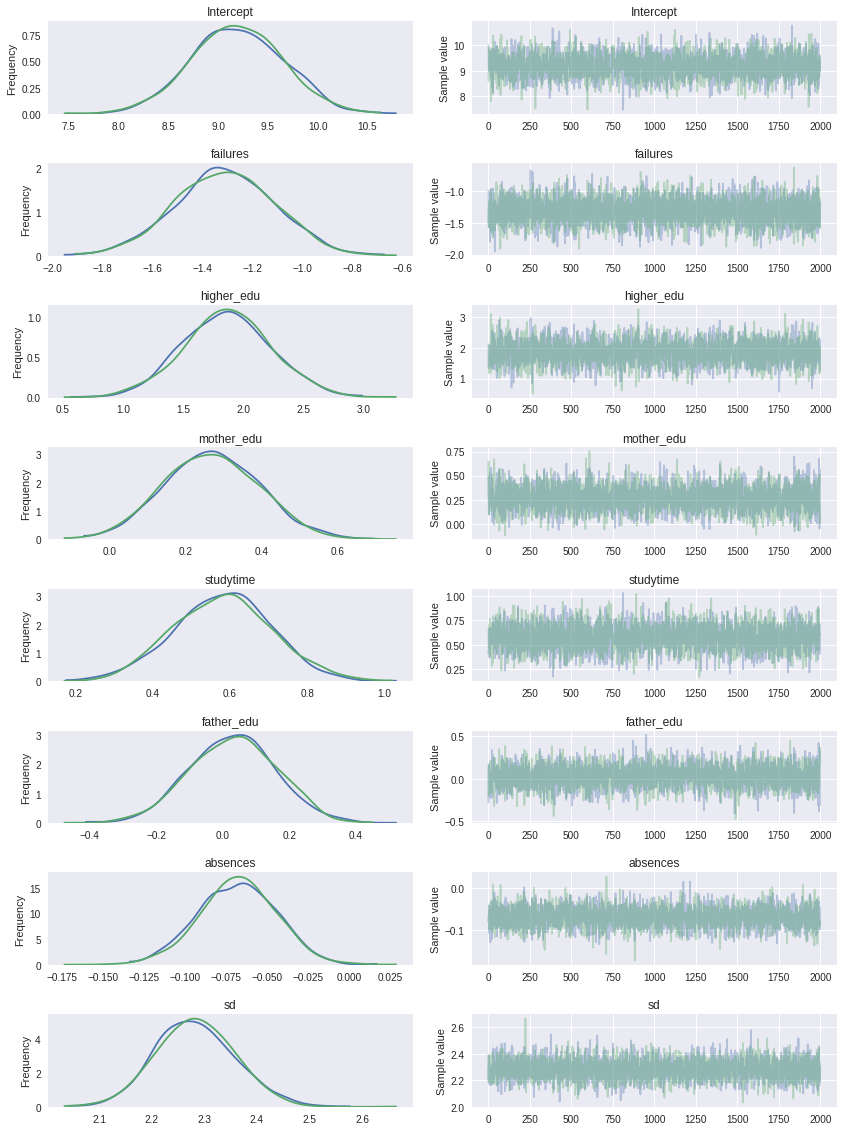

In [26]:
pm.traceplot(normal_trace);

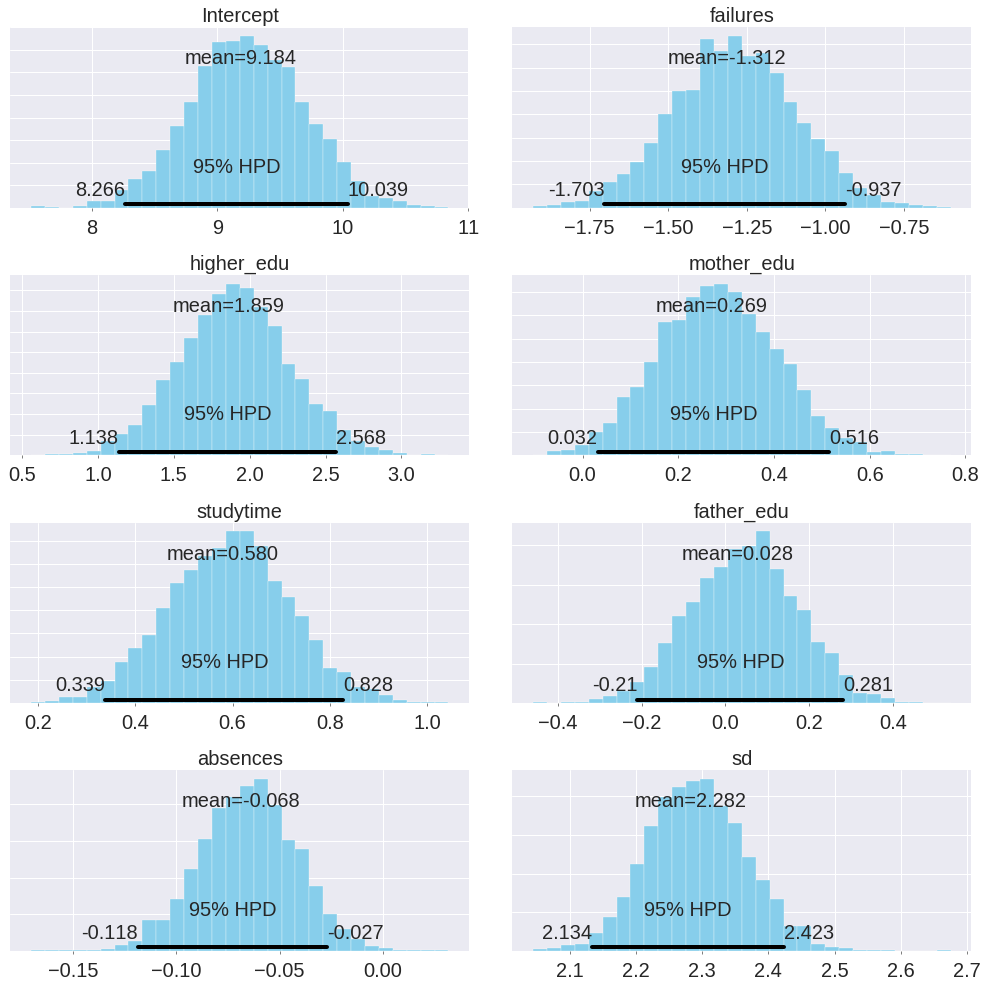

In [27]:
pm.plot_posterior(normal_trace, figsize = (14, 14), text_size=20);


### Interpretations of Weights
Based on the sign and location of the weights, we can make the following inferences regarding the features in our dataset:

- Previous class failures are negatively related to the students final grade
- Higher education ambitions are positively related to the students grade
- The mother's and father's education levels are positively related to the students final grade
- Studying time per week is positively related to the students final grade
- Absences are negatively related to the students final grade

### The German Tank Problem

In [28]:
from pymc3 import DiscreteUniform, Model, sample
from scipy import stats

captured_tanks = [314, 421]

def binom(x, y):
    '''Return binomial coefficient for x, y.'''
    return factorial(x)//(factorial(y) * factorial(x - y))

def analytic_solution(n_tanks, captured_tanks):
    '''Probability that there are n_tanks given a list of captured serial numbers.'''
    k = len(captured_tanks)
    if k < 2:
        raise ValueError("Analytic formula valid for len(captured_tanks) >= 2.".format(k))
    m = max(captured_tanks)
    if n_tanks < m:
        return 0.0
    else:
        return (k - 1)/k * binom(m - 1, k - 1)/binom(n_tanks, k)
      
      

with Model():
    n_tanks = DiscreteUniform('n_tanks', lower=max(captured_tanks), upper=5000)
    obs = DiscreteUniform('obs', lower=0, upper=n_tanks, observed=captured_tanks) 
    trace = sample(10000)

Sequential sampling (2 chains in 1 job)
Metropolis: [n_tanks]
100%|██████████| 10500/10500 [00:01<00:00, 10240.82it/s]
The number of effective samples is smaller than 10% for some parameters.


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


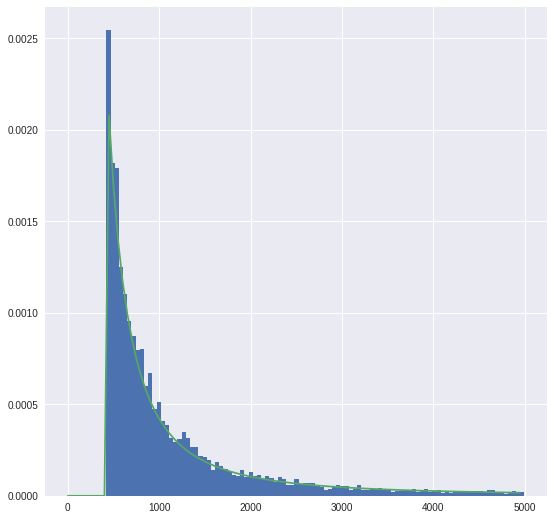

In [29]:
from math import factorial
burn_in = 1000
tank_bins = range(0, 5000, 50)
plt.hist(trace[burn_in:].get_values('n_tanks'), normed=True, bins=100)
plt.plot(tank_bins, [analytic_solution(x, captured_tanks) for x in tank_bins]);

In [0]:
import pymc3 as pm


import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# Initialize random number generator
np.random.seed(123)

# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

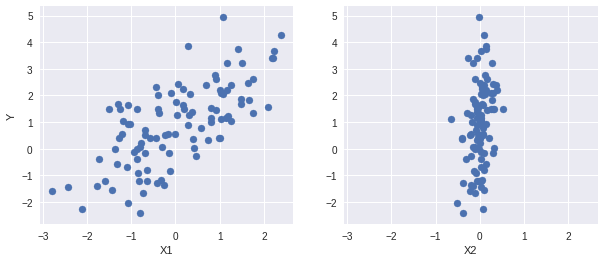

In [31]:
%matplotlib inline

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))
axes[0].scatter(X1, Y)
axes[1].scatter(X2, Y)
axes[0].set_ylabel('Y'); axes[0].set_xlabel('X1'); axes[1].set_xlabel('X2');


In [0]:

basic_model = pm.Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10, shape=2)
    sigma = pm.HalfNormal('sigma', sd=1)

    # Expected value of outcome
    mu = alpha + beta[0]*X1 + beta[1]*X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

In [0]:
# help(pm.Normal) #try help(Model), help(Uniform) or help(basic_model)

In [34]:
map_estimate = pm.find_MAP(model=basic_model)

map_estimate

/usr/local/lib/python3.6/dist-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -149.58, ||grad|| = 12.242: 100%|██████████| 19/19 [00:00<00:00, 775.82it/s]  


{'alpha': array(0.90660093),
 'beta': array([0.94848596, 2.60711845]),
 'sigma': array(0.96298858),
 'sigma_log__': array(-0.03771373)}

In [35]:
map_estimate = pm.find_MAP(model=basic_model, method='powell')

map_estimate

/usr/local/lib/python3.6/dist-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
  0%|          | 0/5000 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/scipy/optimize/_minimize.py:502: RuntimeWarning: Method powell does not use gradient information (jac).
  RuntimeWarning)
logp = -149.47, ||grad|| = 13.248: 100%|██████████| 177/177 [00:00<00:00, 1538.45it/s] 


{'alpha': array(0.90907964),
 'beta': array([0.9514399 , 2.61452795]),
 'sigma': array(0.96568062),
 'sigma_log__': array(-0.03492212)}

In [36]:

with basic_model:
    # draw 500 posterior samples
    trace = pm.sample(500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, beta, alpha]
100%|██████████| 1000/1000 [00:00<00:00, 1039.94it/s]


In [37]:
trace['alpha'][-5:]


array([1.13192831, 1.06551471, 0.96249893, 0.85032842, 1.03713711])

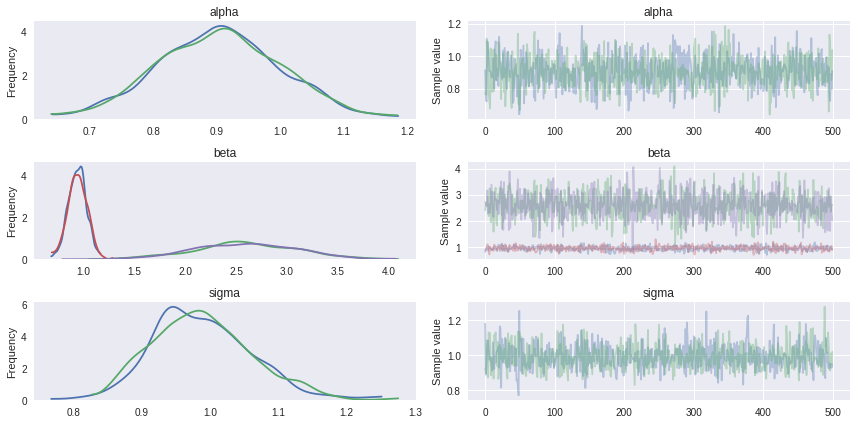

In [38]:
pm.traceplot(trace);

In [39]:
pm.summary(trace).round(2)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha,0.90,0.10,0.00,0.72,1.09,1321.61,1.0
beta__0,0.95,0.09,0.00,0.76,1.11,1389.81,1.0
beta__1,2.59,0.50,0.01,1.61,3.55,1771.07,1.0
sigma,0.99,0.07,0.00,0.86,1.13,1050.02,1.0


In [40]:
import pandas as pd

returns = pd.read_csv(pm.get_data('SP500.csv'), parse_dates=True, index_col=0)

len(returns)

401

In [0]:
with pm.Model() as sp500_model:
    nu = pm.Exponential('nu', 1/10., testval=5.)
    sigma = pm.Exponential('sigma', 1/0.02, testval=.1)

    s = pm.GaussianRandomWalk('s', sd=sigma, shape=len(returns))
    volatility_process = pm.Deterministic('volatility_process', pm.math.exp(-2*s)**0.5)

    r = pm.StudentT('r', nu=nu, sd=volatility_process, observed=returns['change'])

In [42]:
with sp500_model:
    trace = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [s, sigma, nu]
100%|██████████| 2500/2500 [02:28<00:00, 16.79it/s]
The estimated number of effective samples is smaller than 200 for some parameters.


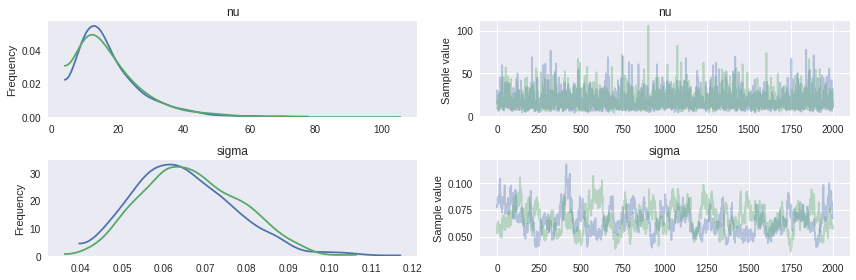

In [43]:

pm.traceplot(trace, varnames=['nu', 'sigma']);

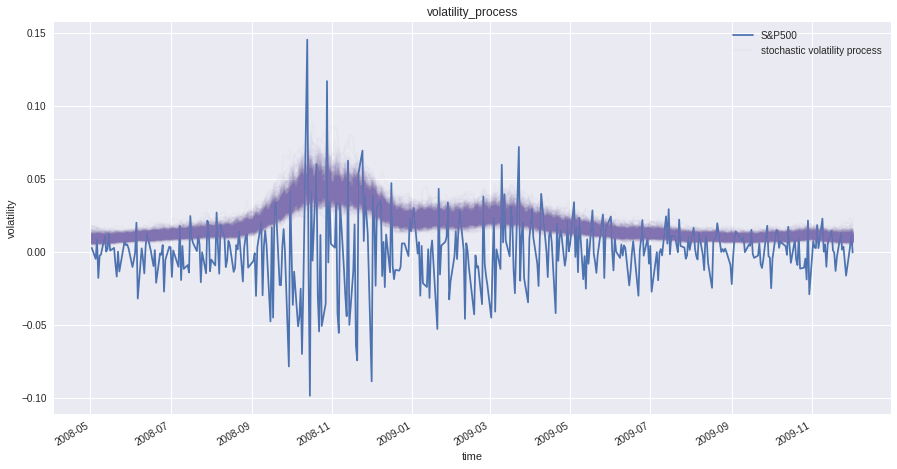

In [44]:
fig, ax = plt.subplots(figsize=(15, 8))
returns.plot(ax=ax)
ax.plot(returns.index, 1/np.exp(trace['s',::5].T), 'C3', alpha=.03);
ax.set(title='volatility_process', xlabel='time', ylabel='volatility');
ax.legend(['S&P500', 'stochastic volatility process']);

## Coal Mining Disaster

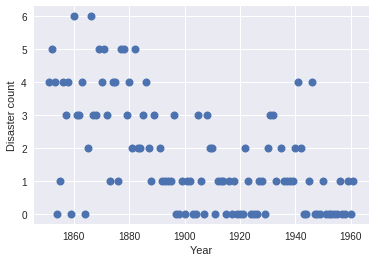

In [45]:
disaster_data = np.ma.masked_values([4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6,
                            3, 3, 5, 4, 5, 3, 1, 4, 4, 1, 5, 5, 3, 4, 2, 5,
                            2, 2, 3, 4, 2, 1, 3, -999, 2, 1, 1, 1, 1, 3, 0, 0,
                            1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1,
                            0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2,
                            3, 3, 1, -999, 2, 1, 1, 1, 1, 2, 4, 2, 0, 0, 1, 4,
                            0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1], value=-999)
years = np.arange(1851, 1962)

plt.plot(years, disaster_data, 'o', markersize=8);
plt.ylabel("Disaster count")
plt.xlabel("Year");

In [46]:
with pm.Model() as disaster_model:

    switchpoint = pm.DiscreteUniform('switchpoint', lower=years.min(), upper=years.max(), testval=1900)

    # Priors for pre- and post-switch rates number of disasters
    early_rate = pm.Exponential('early_rate', 1)
    late_rate = pm.Exponential('late_rate', 1)

    # Allocate appropriate Poisson rates to years before and after current
    rate = pm.math.switch(switchpoint >= years, early_rate, late_rate)

    disasters = pm.Poisson('disasters', rate, observed=disaster_data)

/usr/local/lib/python3.6/dist-packages/pymc3/model.py:1266: UserWarning: Data in disasters contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, UserWarning)


In [47]:
with disaster_model:
    trace = pm.sample(10000)


Sequential sampling (2 chains in 1 job)
CompoundStep
>CompoundStep
>>Metropolis: [disasters_missing]
>>Metropolis: [switchpoint]
>NUTS: [late_rate, early_rate]
100%|██████████| 10500/10500 [00:11<00:00, 910.02it/s]
The number of effective samples is smaller than 10% for some parameters.


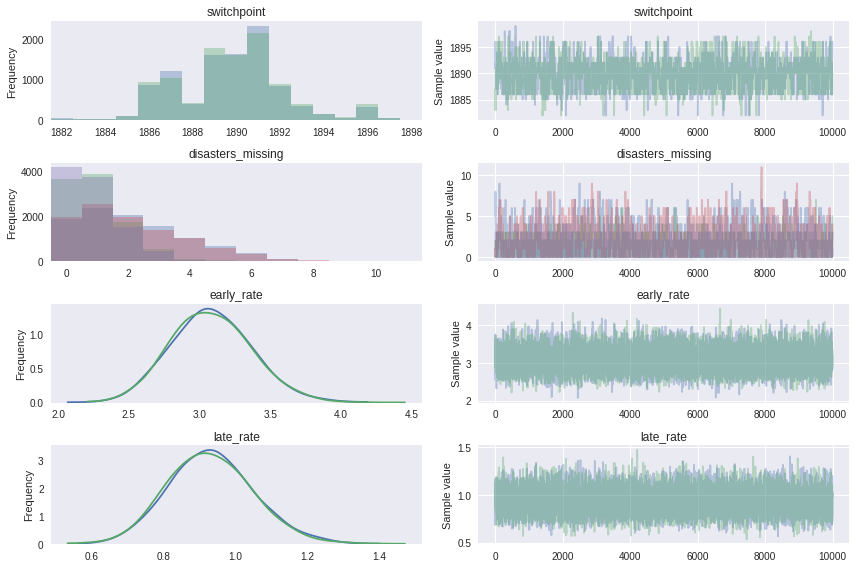

In [48]:
pm.traceplot(trace);

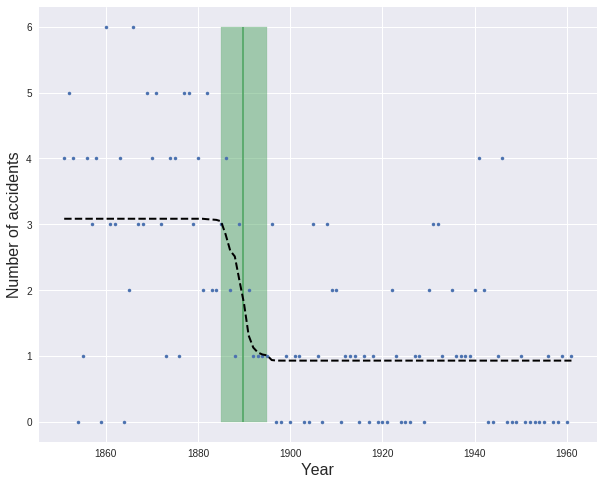

In [49]:
plt.figure(figsize=(10, 8))
plt.plot(years, disaster_data, '.')
plt.ylabel("Number of accidents", fontsize=16)
plt.xlabel("Year", fontsize=16)

plt.vlines(trace['switchpoint'].mean(), disaster_data.min(), disaster_data.max(), color='C1')
average_disasters = np.zeros_like(disaster_data, dtype='float')
for i, year in enumerate(years):
    idx = year < trace['switchpoint']
    average_disasters[i] = (trace['early_rate'][idx].sum() + trace['late_rate'][~idx].sum()) / (len(trace) * trace.nchains)

sp_hpd = pm.hpd(trace['switchpoint'])
plt.fill_betweenx(y=[disaster_data.min(), disaster_data.max()],
                  x1=sp_hpd[0], x2=sp_hpd[1], alpha=0.5, color='C1');
plt.plot(years, average_disasters,  'k--', lw=2);

/usr/local/lib/python3.6/dist-packages/sklearn/semi_supervised/label_propagation.py:292: ConvergenceWarning: max_iter=5 was reached without convergence.
  category=ConvergenceWarning
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:83: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/usr/local/lib/python3.6/dist-packages/sklearn/semi_supervised/label_propagation.py:292: ConvergenceWarning: max_iter=5 was reached without convergence.
  category=ConvergenceWarning
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predict

Iteration 0 ______________________________________________________________________
Label Spreading model: 10 labeled & 320 unlabeled (330 total)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.51      0.86      0.64        29
           2       0.83      0.97      0.90        31
           3       0.00      0.00      0.00        28
           4       0.00      0.00      0.00        27
           5       0.85      0.49      0.62        35
           6       0.84      0.95      0.89        40
           7       0.70      0.92      0.80        36
           8       0.57      0.76      0.65        33
           9       0.41      0.86      0.55        37

   micro avg       0.62      0.62      0.62       320
   macro avg       0.47      0.58      0.50       320
weighted avg       0.51      0.62      0.54       320

Confusion matrix
[[25  3  0  0  0  0  1]
 [ 1 30  0  0  0  0  0]
 [ 0  0 17  7  0  1 10]
 [ 2  0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:83: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/usr/local/lib/python3.6/dist-packages/sklearn/semi_supervised/label_propagation.py:292: ConvergenceWarning: max_iter=5 was reached without convergence.
  category=ConvergenceWarning
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:83: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/usr/local/lib/python3.6/dist-packages/sklearn/semi_supervised/label_propagation.py:292: ConvergenceWarning: max_iter=5 was reached without convergence.
  category=ConvergenceWarning
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:83: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future


Iteration 3 ______________________________________________________________________
Label Spreading model: 25 labeled & 305 unlabeled (330 total)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.68      0.85      0.75        27
           2       1.00      0.90      0.95        31
           3       1.00      0.77      0.87        26
           4       1.00      0.92      0.96        24
           5       0.89      0.97      0.93        33
           6       1.00      0.97      0.99        39
           7       0.95      1.00      0.97        35
           8       0.66      0.81      0.72        31
           9       0.97      0.78      0.87        37

   micro avg       0.90      0.90      0.90       305
   macro avg       0.91      0.90      0.90       305
weighted avg       0.91      0.90      0.90       305

Confusion matrix
[[22  0  0  0  0  0  0  0  0  0]
 [ 0 23  0  0  0  0  0  0  4  0]
 [ 0  1 28  0

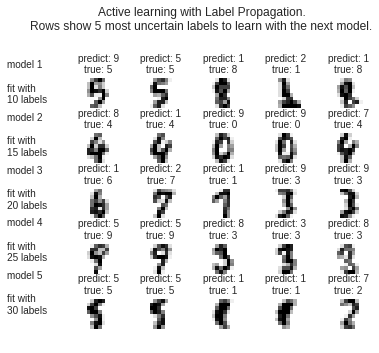

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn import datasets
from sklearn.semi_supervised import label_propagation
from sklearn.metrics import classification_report, confusion_matrix

digits = datasets.load_digits()
rng = np.random.RandomState(0)
indices = np.arange(len(digits.data))
rng.shuffle(indices)

X = digits.data[indices[:330]]
y = digits.target[indices[:330]]
images = digits.images[indices[:330]]

n_total_samples = len(y)
n_labeled_points = 10
max_iterations = 5

unlabeled_indices = np.arange(n_total_samples)[n_labeled_points:]
f = plt.figure()

for i in range(max_iterations):
    if len(unlabeled_indices) == 0:
        print("No unlabeled items left to label.")
        break
    y_train = np.copy(y)
    y_train[unlabeled_indices] = -1

    lp_model = label_propagation.LabelSpreading(gamma=0.25, max_iter=5)
    lp_model.fit(X, y_train)

    predicted_labels = lp_model.transduction_[unlabeled_indices]
    true_labels = y[unlabeled_indices]

    cm = confusion_matrix(true_labels, predicted_labels,
                          labels=lp_model.classes_)

    print("Iteration %i %s" % (i, 70 * "_"))
    print("Label Spreading model: %d labeled & %d unlabeled (%d total)"
          % (n_labeled_points, n_total_samples - n_labeled_points,
             n_total_samples))

    print(classification_report(true_labels, predicted_labels))

    print("Confusion matrix")
    print(cm)

    # compute the entropies of transduced label distributions
    pred_entropies = stats.distributions.entropy(
        lp_model.label_distributions_.T)

    # select up to 5 digit examples that the classifier is most uncertain about
    uncertainty_index = np.argsort(pred_entropies)[::-1]
    uncertainty_index = uncertainty_index[
        np.in1d(uncertainty_index, unlabeled_indices)][:5]

    # keep track of indices that we get labels for
    delete_indices = np.array([])

    # for more than 5 iterations, visualize the gain only on the first 5
    if i < 5:
        f.text(.05, (1 - (i + 1) * .183),
               "model %d\n\nfit with\n%d labels" %
               ((i + 1), i * 5 + 10), size=10)
    for index, image_index in enumerate(uncertainty_index):
        image = images[image_index]

        # for more than 5 iterations, visualize the gain only on the first 5
        if i < 5:
            sub = f.add_subplot(5, 5, index + 1 + (5 * i))
            sub.imshow(image, cmap=plt.cm.gray_r, interpolation='none')
            sub.set_title("predict: %i\ntrue: %i" % (
                lp_model.transduction_[image_index], y[image_index]), size=10)
            sub.axis('off')

        # labeling 5 points, remote from labeled set
        delete_index, = np.where(unlabeled_indices == image_index)
        delete_indices = np.concatenate((delete_indices, delete_index))

    unlabeled_indices = np.delete(unlabeled_indices, delete_indices)
    n_labeled_points += len(uncertainty_index)

f.suptitle("Active learning with Label Propagation.\nRows show 5 most "
           "uncertain labels to learn with the next model.", y=1.15)
plt.subplots_adjust(left=0.2, bottom=0.03, right=0.9, top=0.9, wspace=0.2,
                    hspace=0.85)
plt.show()